LOGISTIC REGRESSION ON SUV DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
suv = pd.read_csv("suv_data.csv")

In [3]:
suv.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
suv.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
suv.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:xlabel='Purchased', ylabel='count'>

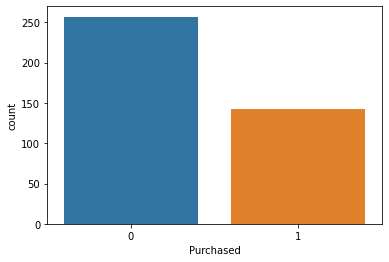

In [6]:
sns.countplot(x = 'Purchased', data = suv)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

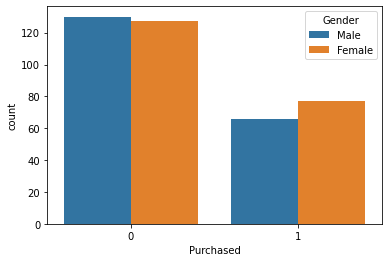

In [7]:
sns.countplot(x = 'Purchased',hue = 'Gender', data = suv)

<AxesSubplot:>

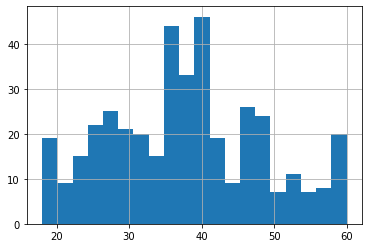

In [8]:
suv['Age'].hist(bins = 20)

<AxesSubplot:ylabel='Frequency'>

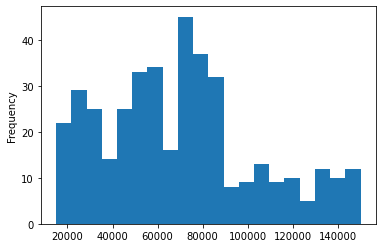

In [9]:
suv['EstimatedSalary'].plot.hist(bins = 20)

In [10]:
buyers_sal = suv[(suv['Purchased']==1)]

In [11]:
buyers_sal

,User ID,Gender,Age,EstimatedSalary,Purchased
7,15694829,Female,32,150000,1
16,15733883,Male,47,25000,1
17,15617482,Male,45,26000,1
18,15704583,Male,46,28000,1
19,15621083,Female,48,29000,1
...,...,...,...,...,...
393,15635893,Male,60,42000,1
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1


In [12]:
len(buyers_sal)

143

<AxesSubplot:ylabel='Frequency'>

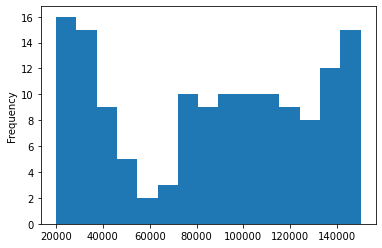

In [13]:
buyers_sal['EstimatedSalary'].plot.hist(bins = 15, label= "Salary of those that Purchased Suv")

DATA WRANGLING

In [14]:
suv.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [15]:
Gender = pd.get_dummies(suv['Gender'], drop_first = True)

In [16]:
Gender

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [17]:
suv.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [18]:
suv = pd.concat([suv,Gender], axis = 1)

In [19]:
suv.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [20]:
suv = suv.drop(['User ID', 'Gender',], axis = 1)

In [21]:
suv

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


TRAIN

In [22]:
x= suv.drop('Purchased', axis=1)
y = suv['Purchased']

In [23]:
x

,Age,EstimatedSalary,Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [28]:
x_train.shape, y_train.shape,x_test.shape,y_test.shape

((300, 3), (300,), (100, 3), (100,))

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model = LogisticRegression()

In [31]:
model.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pred = model.predict(x_test)

In [103]:
from sklearn.metrics import classification_report
print(f'{classification_report(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_test,y_pred)

array([[65,  3],
       [ 7, 25]], dtype=int64)

In [36]:
##ACCURACY
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

In [37]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)
#it is about being precise, how accurate the model is.89% accuracy in the prediction of the model

0.8928571428571429

In [38]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)
#the regression can identify buyer in the test set at 78% of the time

0.78125

In [39]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.8333333333333334

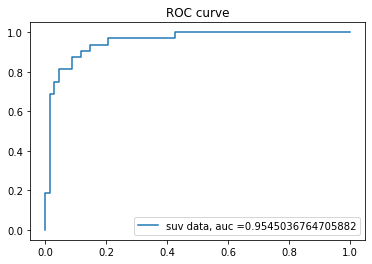

In [40]:
from sklearn import metrics
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test, y_pred_proba)
auc=metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr, label = 'suv data, auc ='+str(auc))
plt.title('ROC curve')
plt.legend(loc=4)
plt.show()

In [41]:
print('intercept',model.intercept_[0])
print('classes', model.classes_)
columns = ['age','EstimatedSalary', 'sex']
pd.DataFrame({'coeff': model.coef_[0]}, index = columns)

intercept -0.9612111551406219
classes [0 1]


,coeff
age,2.095877
EstimatedSalary,1.117764
sex,0.094526


LINEAR REGRESSION

In [42]:
mark = pd.read_csv('Student_Marks.csv')

In [43]:
mark.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [44]:
from scipy import stats

In [45]:
x= mark['time_study']
y= mark['Marks']

In [46]:
x.shape, y.shape

((100,), (100,))

In [47]:
slope,intercept, r, p, std = stats.linregress(x,y)

In [48]:
slope,intercept, r, p, std

(5.688750421250443,
 1.2238581075029664,
 0.942253890364054,
 2.3556571798441493e-48,
 0.20424445234890246)

In [49]:
def myfunc(x):
    return slope*x + intercept
y_pred = list(map(myfunc, x))

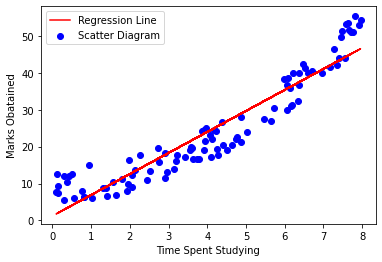

In [50]:
# THE ACTUAL DATA
plt.scatter(x,y, color ="blue", label = 'Scatter Diagram')
plt.plot(x,y_pred, color = 'red', label = 'Regression Line')
plt.xlabel('Time Spent Studying')
plt.ylabel('Marks Obatained')
plt.legend()
plt.show()

In [51]:
r2 = r*r
print(r2)

0.8878423939061948


In [52]:
#predicted Mark for student that reads for 10 hours
myfunc(10)

58.1113623200074

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [54]:
x= mark['time_study'].values
y= mark['Marks'].values
x= x.reshape((-1,1))
X_train,X_test,Y_train,Y_test = train_test_split(x,y)

In [55]:
x.shape,y.shape

((100, 1), (100,))

In [56]:
mymodel = LinearRegression()
mymodel = mymodel.fit(X_train,Y_train)

In [57]:
mymodel.intercept_

0.9813379200098105

In [58]:
mymodel.coef_

array([5.54011954])

In [59]:
mymodel.score(X_train,Y_train) #this is the r2

0.8767001981544321

In [60]:
mymodel.score(X_test,Y_test) #this is the r2 for the test data, it's an unbiased measure of the prediction

0.8874975574344915

In [61]:
def myfunct(X_train):
    return mymodel.coef_*X_train + mymodel.intercept_
yp = list(map(myfunct, X_train))

In [62]:
yp = np.array(yp)

In [63]:
yp.shape

(75, 1)

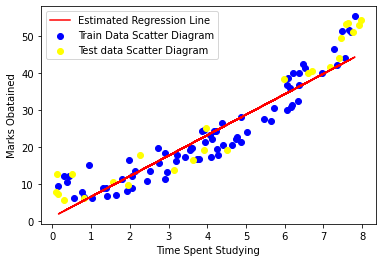

In [64]:
# PREDICTED DATA
plt.scatter(X_train,Y_train, color ="blue", label = 'Train Data Scatter Diagram')
plt.scatter(X_test,Y_test, color ="yellow", label = 'Test data Scatter Diagram')
plt.plot(X_train,yp ,color = 'red', label = 'Estimated Regression Line')
plt.xlabel('Time Spent Studying')
plt.ylabel('Marks Obatained')
plt.legend()
plt.show()

In [65]:
myfunct(10)

array([56.38253332])

In [66]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(Y_train,yp)
MSE

19.54774714759528

In [67]:
RMSE = math.sqrt(MSE)
print('Root Mean Square Error =' + str(RMSE))

Root Mean Square Error =4.421283427648049


# DECISION TREE

In [68]:
from sklearn import datasets

In [69]:
iris = datasets.load_iris()

In [70]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [71]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [72]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [73]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [74]:
data=pd.DataFrame({'sepal length':iris.data[:,0],
 'sepal width':iris.data[:,1],
 'petal length':iris.data[:,2],
 'petal width':iris.data[:,3],
    'species':iris.target})

In [75]:
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [76]:
data.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [77]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [78]:
data.corr()

,sepal length,sepal width,petal length,petal width,species
sepal length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal width,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

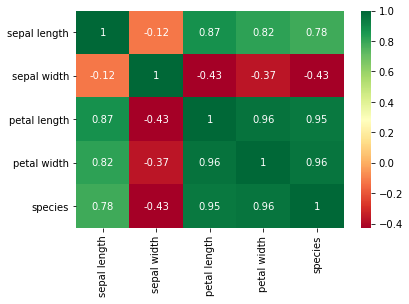

In [79]:
sns.heatmap(data.corr(),annot = True, cmap = 'RdYlGn')

array([[<AxesSubplot:title={'center':'sepal length'}>,
        <AxesSubplot:title={'center':'sepal width'}>],
       [<AxesSubplot:title={'center':'petal length'}>,
        <AxesSubplot:title={'center':'petal width'}>],
       [<AxesSubplot:title={'center':'species'}>, <AxesSubplot:>]],
      dtype=object)

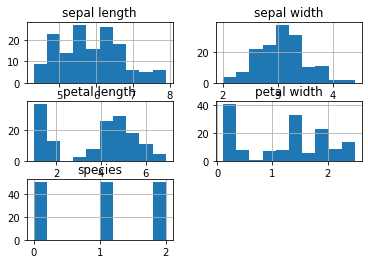

In [80]:
data.hist()

<AxesSubplot:xlabel='species', ylabel='count'>

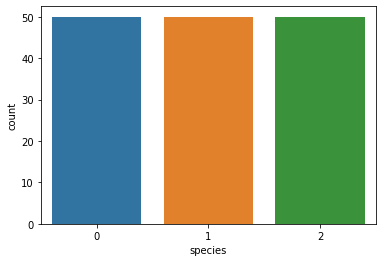

In [81]:
sns.countplot(x = 'species', data = data)

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
x = data.drop('species', axis = 1)
y= data[['species']]

In [84]:
x.shape, y.shape

((150, 4), (150, 1))

In [85]:
x_train, x_test,y_train,y_test= train_test_split(x,y, test_size = 0.25, random_state= 1)

In [86]:
dtc = DecisionTreeClassifier(criterion ='entropy')

In [87]:
dtc= dtc.fit(x_train,y_train)

In [88]:
y_pred = dtc.predict(x_test)

In [89]:
dtc.score(x_test,y_test)

0.9736842105263158

In [90]:
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [91]:
from sklearn.metrics import accuracy_score
print('the model accuracy =' + str(accuracy_score(y_test,y_pred)))

the model accuracy =0.9736842105263158


In [92]:
dtc.predict([[6.7,3.1,5.6,2.4]]) #individual prediction

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])

In [93]:
dtc.predict([[3,5,4,2]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [94]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print('the model precision =' + str(precision_score(y_test,y_pred, average = 'micro')))
print('the model recall =' + str(recall_score(y_test,y_pred,average = 'micro')))
print('the model f1 =' + str(f1_score(y_test,y_pred,average = 'micro')))

the model precision =0.9736842105263158
the model recall =0.9736842105263158
the model f1 =0.9736842105263158


# RANDOM FOREST

In [95]:
#WITH THE SAME DATASET, IRIS

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
rfc = RandomForestClassifier(n_estimators = 100)

In [98]:
x_train, x_test,y_train,y_test= train_test_split(x,y, test_size = 0.3)
rfc= rfc.fit(x_train,y_train)

<ipython-input-98-33266c1ca2ad>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc= rfc.fit(x_train,y_train)


In [99]:
y_pred= rfc.predict(x_test)

In [100]:
print('the model accuracy =' + str(accuracy_score(y_test,y_pred)))

the model accuracy =0.9777777777777777


In [101]:
rfc.predict([[3,5,4,2]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [102]:
print(f'{classification_report(y_test,y_pred)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

